Starting anomaly detection project...
✅ Login data created:
            timestamp   user  success             ip  time_gap
0 2025-01-01 00:00:00  user1        1  192.168.0.190         3
1 2025-01-01 00:00:04  user2        0   192.168.0.36        82
2 2025-01-01 00:00:18  user1        1  192.168.0.152       246
3 2025-01-01 00:00:03  user1        1   192.168.0.24       141
4 2025-01-01 00:00:16  guest        1  192.168.0.155        43
5 2025-01-01 00:00:45  user2        1  192.168.0.184       244
6 2025-01-01 00:00:24  admin        1  192.168.0.151       172
7 2025-01-01 00:00:07  user2        1  192.168.0.179       246
8 2025-01-01 00:00:48  user3        1   192.168.0.40       140
9 2025-01-01 00:00:54  user1        1   192.168.0.24       224
✅ Features ready. Training model...
✅ Model trained and predictions made!
Detected 50 anomalies

Sample anomalies (suspicious logins):
              timestamp   user  time_gap  success
1   2025-01-01 00:00:04  user2        82        0
11  2025-01-

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


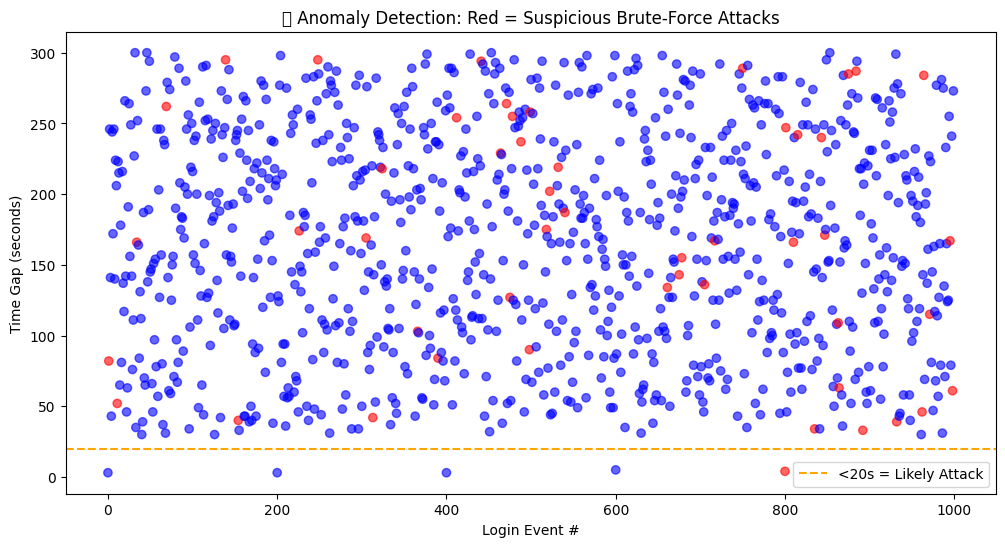


🎉 PROJECT COMPLETE! 


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

print("Starting anomaly detection project...")

# Generate fake login data
np.random.seed(42)
random.seed(42)
logins = []
start_time = datetime(2025, 1, 1)

for i in range(1000):
    timestamp = start_time + timedelta(seconds=i * random.randint(1, 10))
    user_id = random.choice(['user1', 'user2', 'user3', 'admin', 'guest'])
    success = np.random.choice([1, 0], p=[0.95, 0.05])
    ip = f"192.168.0.{random.randint(1, 255)}"

    # Create anomalies (brute force: very fast logins)
    if i % 200 == 0:
        time_gap = random.randint(1, 5)
    else:
        time_gap = random.randint(30, 300)

    logins.append([timestamp, user_id, success, ip, time_gap])

df = pd.DataFrame(logins, columns=['timestamp', 'user', 'success', 'ip', 'time_gap'])
print("✅ Login data created:")
print(df.head(10))

# Features
df['hour'] = df['timestamp'].dt.hour
df['user_encoded'] = df['user'].astype('category').cat.codes
df['ip_num'] = df['ip'].apply(lambda x: int(x.split('.')[-1]))

features = df[['time_gap', 'success', 'hour', 'user_encoded', 'ip_num']].values

print("✅ Features ready. Training model...")

# Train model (FIT FIRST!)
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(features)  # ← THIS WAS MISSING!

# Predict
df['anomaly'] = model.predict(features)

print("✅ Model trained and predictions made!")
print(f"Detected {len(df[df['anomaly'] == -1])} anomalies")

# Show anomalies
anomalies = df[df['anomaly'] == -1]
print("\nSample anomalies (suspicious logins):")
print(anomalies[['timestamp', 'user', 'time_gap', 'success']].head())

# Plot
plt.figure(figsize=(12, 6))
colors = ['red' if x == -1 else 'blue' for x in df['anomaly']]
plt.scatter(range(len(df)), df['time_gap'], c=colors, alpha=0.6)
plt.xlabel('Login Event #')
plt.ylabel('Time Gap (seconds)')
plt.title('🛡️ Anomaly Detection: Red = Suspicious Brute-Force Attacks')
plt.axhline(y=20, color='orange', linestyle='--', label='<20s = Likely Attack')
plt.legend()
plt.show()

print("\n🎉 PROJECT COMPLETE! ")
